# Question 1
For the beginning, I decided to plot the relationsships between the x and y training data and the relationships between the x and y testing data to see the kind of relationhips that exist between them at that point

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load in datasets
x_train = np.load("data/x_train.npy")
y_train = np.load("data/y_train.npy")
x_test = np.load("data/x_test.npy")
y_test = np.load("data/y_test.npy")

In [4]:
# adding a column of ones to the x variable to account for the intercept
x = np.insert(x_train, 0, 1.0, axis=1)
y = y_train

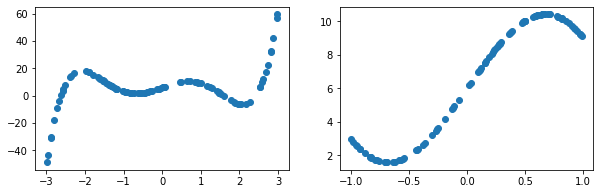

In [5]:
# training x and y datasets
f = plt.figure(figsize=(10, 3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.scatter(x_train, y_train)
ax2.scatter(x_test, y_test)

1. The image on the left is the x_train vs the y_train and the image on the right is the x_test against the y_test. Looking at the relationships between teh training and testing variables, the functions that looks to best describe the realtionships between the predictor and output values are polynomial realtionships of the 3rd and 5th degree, which is x^3 and x^5. These functions will be modeled along with others for confirmation.
2. a. The relationship between the two is certainly not linear.\
   b. Yes, here I would need some sort of feature engineering to be able to add some non-linearity to be able to model these relationships. From the answer to the first question, I would want to use 3rd degree polynomial and also use the 5th degree polynomial. But first however, I went ahead and wrote down the code for the normal relationships and then compare the accuracies between them.\
      i. I can engineer these said features by creating new basis transformations for the x variable. Since, it is just one variable, we would take the x^2 through to the x^5 factor of the x variable to take care of the 3rd degree, which stops at x^3 and 5th degree which stops at x^5
      ii. The functions I can try is adding the feature mentioned above to the training dataset. Adding to x^3 for the 3rd degree polynomial modeling and to x^5 for the 5th degree polynomial.

In [6]:
# In order to model the gradient descent, we will set some initial parameters, changeable and executable as and when needed
# This part of the code is for the initial equation without the 
# learning rate = lr, size of the target variable = m, parameters for the x variables = theta
lr = 0.1
m = y_train.size
# initailizing random paramters for the equation
np.random.seed(10)
theta = np.random.rand(2)
# define the gradient descent function
def gradient_descent(x, y, m, theta, lr):
    # create open lists to house the values of the cost efficiency, the parameters and the predictions
    cost_list = []
    theta_list = []
    prediction_list = []
    minima_not_reached = True
    cost_list.append(1e10)
    i = 0
    while minima_not_reached:
        prediction =  np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        cost_list.append(cost)
        theta = theta - (lr * (1/m) * np.dot(x.T, error))
        theta_list.append(theta)
        if cost_list[i] - cost_list[i+1] < 1e-9:
            minima_not_reached = False
        i += 1
    cost_list.pop(0)
    return prediction_list, cost_list, theta_list

In [7]:
# get back the prediction_lists or the y_hats, cost_list and the list of the betas
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, lr)
theta = theta_list[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat = theta[0] + theta[1]*x[:,1]

# Using the prediction equation to calculate MSE
MSE = ((y_hat - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

# Using the prediction equation to calculate the RSquare
y_bar = np.sum(y)/len(y)
ssreg = np.sum((y - y_hat) ** 2)
sstot = np.sum((y - y_bar) ** 2)
RSquare = 1 - (ssreg / sstot)
print(f'The RSquare is {RSquare}')

The beta parameters of the equation are [6.19313566 3.30655978]
The Mean Square error of the training data is 169.33472640489606
The Mean Square error of the testing data is 45.333224635550096
The RSquare is 0.15919469136413245


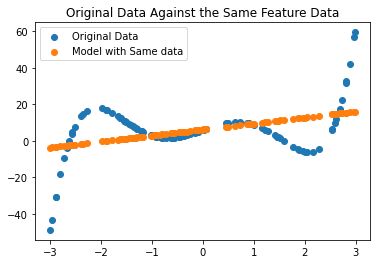

In [9]:
plt.scatter(x_train, y_train, label='Original Data')
plt.scatter(x_train, prediction_list[-1], label='Model with Same data')
plt.title('Original Data Against the Same Feature Data')
plt.legend(loc='upper left')

### Using the gradient descent and creating the model for the 3rd degree polynomial

In [10]:
# for the third degree polynomial, as used we would need 1st, 2nd and 3rd degree of the predictor variables
# I converted to a dataframe, made the adjustments and then change back to an array.
x1 = pd.DataFrame(x)
x1['2'] = x1[1] ** 2
x1['3'] = x1[1] ** 3
x1 = np.array(x1)

In [11]:
lr1 = 0.01
m1 = y_train.size
np.random.seed(10)
theta1 = np.random.rand(4)

prediction_list1, cost_list1, theta_list1 = gradient_descent(x1, y, m1, theta1, lr1)
theta1 = theta_list1[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta1}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list1[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat1 = theta1[0] + theta1[1]*x1[:,1] + theta1[2]*x1[:,2] + theta1[3]*x1[:,3]

# Using the prediction equation to calculate MSE
MSE = ((y_hat1 - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

# Using the prediction equation to calculate the RSquare
y_bar = np.sum(y)/len(y)
ssreg = np.sum((y - y_hat1) ** 2)
sstot = np.sum((y - y_bar) ** 2)
RSquare = 1 - (ssreg / sstot)
print(f'The RSquare is {RSquare}')

The beta parameters of the equation are [ 3.57948673 -8.86569264  0.36670865  2.14844889]
The Mean Square error of the training data is 81.07774172189009
The Mean Square error of the testing data is 133.5849694557597
The RSquare is 0.5974210541559519


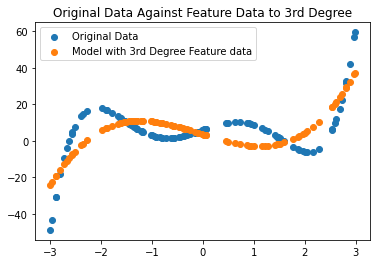

In [12]:
plt.scatter(x_train, y_train, label='Original Data')
plt.scatter(x_train, prediction_list1[-1], label='Model with 3rd Degree Feature data')
plt.title('Original Data Against Feature Data to 3rd Degree')
plt.legend(loc='upper left')

### Using the gradient descent and creating the model for the 5th degree polynomial

In [13]:
# for the fifth degree polynomial, as used we would need 1st, 2nd, 3rd, 4th and 5th degree of the predictor variables
# I converted to a dataframe, made the adjustments and then change back to an array.
x2 = pd.DataFrame(x1)
x2['4'] = x2[1] ** 4
x2['5'] = x2[1] ** 5
x2 = np.array(x2)


In [14]:
lr2 = 0.0001
m2 = y_train.size
np.random.seed(10)
theta2 = np.random.rand(6)

prediction_list2, cost_list2, theta_list2 = gradient_descent(x2, y, m2, theta2, lr2)
theta2 = theta_list2[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta2}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list2[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat2 = theta2[0] + theta2[1]*x2[:,1] + theta2[2]*x2[:,2] + theta2[3]*x2[:,3] + theta2[4]*x2[:,4] + theta2[5]*x2[:,5]

# Using the prediction equation to calculate MSE
MSE = ((y_hat2 - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

# Using the prediction equation to calculate the RSquare
y_bar = np.sum(y)/len(y)
ssreg = np.sum((y - y_hat2) ** 2)
sstot = np.sum((y - y_bar) ** 2)
RSquare = 1 - (ssreg / sstot)
print(f'The RSquare is {RSquare}')

The beta parameters of the equation are [ 5.99146087e+00  9.97824926e+00  3.88318377e-03 -7.99075233e+00
 -3.58846154e-04  9.99180524e-01]
The Mean Square error of the training data is 8.046160848045474e-05
The Mean Square error of the testing data is 214.59690043897908
The RSquare is 0.9999996004902985


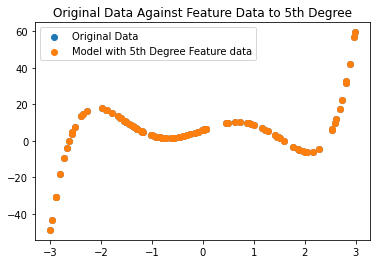

In [15]:
plt.scatter(x_train, y_train, label='Original Data')
plt.scatter(x_train, prediction_list2[-1], label='Model with 5th Degree Feature data')
plt.title('Original Data Against Feature Data to 5th Degree')
plt.legend(loc='upper left')

With the 5th order polynomial, I tried different learning rates and with the learning rates I tried, anything greater than 0.0001 caused the model to completely diverge. When I used a value less than that, the model was being over fitting to the training data. This is shown when the model if run and from the results, we can see that the MSE from the training data is almost negligible and that from the testing data is higher than the one from the 3rd degree polynomial function. This shows that the 3rd degree fits the model the best and additionally, the test data seemed to resemble a 3rd order polynomial so that is also in agreement.

# Question 2

In [184]:
# read in dataset
df = pd.read_csv('Data/Assignment1_Q2_Data.csv')

# creating the predictor variables for the x variables excluding House ID and Price
x = np.array(df.drop(['House ID', 'Price (1000$)'], axis=1))
y = np.array(df['Price (1000$)'])

# in order to calculate the for the MSE for the testing data and the RSquare, we would have to split the data
split = round(x.shape[0] * 0.8, 0)
x_trai = x[:22]
# print(x_train.shape)
x_tes = x[22:]
# print(x_test.shape)
y_train = y[:22]
# print(y_train.shape)
y_test = y[22:]
# print(y_test.shape)
x_train = np.insert(x_trai, 0, 1.0, axis=1)
x_test = np.insert(x_tes, 0, 1.0, axis=1)

In [173]:
# using the same equations and implementations to be able to model out the equation for this
# question, we have 
lr = 0.001
m = y.size
np.random.seed(10)
theta = np.random.rand(12)

prediction_list, cost_list, theta_list = gradient_descent(x_train, y_train, m, theta, lr)
theta = theta_list[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat = theta[0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + theta[5]*x_test[:,5] + theta[6]*x_test[:,6] + theta[7]*x_test[:,7] + theta[8]*x_test[:,8] + theta[9]*x_test[:,9] + theta[10]*x_test[:,10] + theta[11]*x_test[:,11]

# Using the prediction equation to calculate MSE
MSE = ((y_hat - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

The beta parameters of the equation are [-0.11592564  2.28573735 14.3553132   0.66933539  2.20976584  2.33721091
 -4.99318846  5.62938048  0.07048837 -0.27403288  4.18008062  6.31782469]
The Mean Square error of the training data is 4.706512549113003
The Mean Square error of the testing data is 92.36778112568167


2. 1. The average least square error for the given data using the model is 92.3677

To find the most important and least important, the features would have to be normalized to the same standard since co-efficients are not enough to determine that.

In [174]:
# I had to come back and normalize the data since the co-efficeints cannot be used for feature importance
x = (x - x.min())/(x.max() - x.min())
y = (y - y.min())/(y.max() - y.min())

# in order to calculate the for the MSE for the testing data and the RSquare, we would have to split the data
split = round(x.shape[0] * 0.8, 0)
x_train = x[:22]
# print(x_train.shape)
x_test = x[22:]
# print(x_test.shape)
y_train = y[:22]
# print(y_train.shape)
y_test = y[22:]
# print(y_test.shape)

# using the same equations and implementations to be able to model out the equation for this
# question, we have 
lr = 0.0001
m = y.size
np.random.seed(10)
theta = np.random.rand(11)

prediction_list, cost_list, theta_list = gradient_descent(x_train, y_train, m, theta, lr)
theta = theta_list[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat = theta[0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + theta[5]*x_test[:,5] + theta[6]*x_test[:,6] + theta[7]*x_test[:,7] + theta[8]*x_test[:,8] + theta[9]*x_test[:,9] + theta[10]*x_test[:,10]

# Using the prediction equation to calculate MSE
MSE = ((y_hat - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

The beta parameters of the equation are [ 1.66728197  0.15100444  0.99002556  0.92252672  0.60848168  0.47774195
  0.35083276 -0.32752083  0.24146934  0.05142181  0.77760012]
The Mean Square error of the training data is 0.0167963044874735
The Mean Square error of the testing data is 2.236373587694179


In [175]:
theta

array([ 1.66728197,  0.15100444,  0.99002556,  0.92252672,  0.60848168,
        0.47774195,  0.35083276, -0.32752083,  0.24146934,  0.05142181,
        0.77760012])

In [142]:
df.head(2)

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5


2. 2. From this, the most important feature is shown to be the third one and from the df main table, since the first is the intercept, it would be the Bathrooms value. That is how I am able to identify the most important variable. And no, even though it is the most important, I cannot use just that feature to predict the price. Reason being that, even though it is the most important, feature selection tells us that there could be other variables that are essential to predicting the price. There is a chance all the other parameters are redundant but it is still not enough. 

2. 3. The factor with the least influence on the final value is the Architecture type. I know this from the feature selection ouptut parameters using the normalized variables.

In [202]:
df.columns

Index(['House ID', 'Local Price', 'Bathrooms', 'Land Area', 'Living area',
       '# Garages', '# Rooms', '# Bedrooms', 'Age of home',
       'Construction type', 'Architecture type', '# Fire places',
       'Price (1000$)'],
      dtype='object')

In [209]:
x = np.array(df.drop(['House ID', 'Price (1000$)', 'Architecture type'], axis=1))
x_trai = x[:22]
x_tes = x[22:]
x_train = np.insert(x_trai, 0, 1.0, axis=1)
x_test = np.insert(x_tes, 0, 1.0, axis=1)

In [212]:
# using the same equations and implementations to be able to model out the equation for this
# question, we have 
lr = 0.001
m = y.size
np.random.seed(10)
theta = np.random.rand(11)

prediction_list, cost_list, theta_list = gradient_descent(x_train, y_train, m, theta, lr)
theta = theta_list[-1]
# parameters or the beta values
print(f'The beta parameters of the equation are {theta}')

# Using the prediction equation to calculate MSE
MSE = ((prediction_list[-1] - y_train) ** 2).mean()
print(f'The Mean Square error of the training data is {MSE}')

# Using the betas now for testing against the test data
y_hat = theta[0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + theta[5]*x_test[:,5] + theta[6]*x_test[:,6] + theta[7]*x_test[:,7] + theta[8]*x_test[:,8] + theta[9]*x_test[:,9] + theta[10]*x_test[:,10]

# Using the prediction equation to calculate MSE
MSE = ((y_hat - y_test) ** 2).mean()
print(f'The Mean Square error of the testing data is {MSE}')

The beta parameters of the equation are [ 7.56430877  2.99716386  6.29232845  0.38937668  4.57750457  2.41803879
 -3.04721081  2.67941271 -0.01203721  0.02479547  4.80199709]
The Mean Square error of the training data is 5.901530364152987
The Mean Square error of the testing data is 83.19291123988803


Taking the least important variable out, the model got slightly better and it is still doing some good work in predictions. The training data MSE went up but the testing data MSE came down.

# Question 3

In [220]:
x_train = np.load("data/x_train.npy")
y_train = np.load("data/y_train.npy")
x_test = np.load("data/x_test.npy")
y_test = np.load("data/y_test.npy")

In [248]:
# adding a column of ones to the x variable to account for the intercept
#x = np.insert(x_train, 0, 1.0, axis=1)
x = x_train
y = y_train.reshape(100, 1)

In [233]:
# Weight Matrix in code. This is a diagonal matrix.
def wm(point, X, tau): 
  # where  
  # tau --> bandwidth
  # X --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    w = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
    return w

In [234]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a colomn of ones in X to add the bias term serving as the intercept
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    w = wm(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [236]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

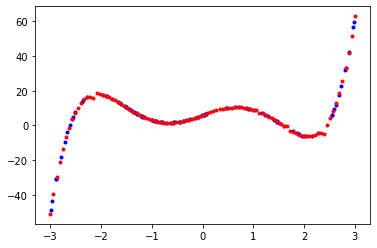

In [279]:
# using the data set that was given in th question one for the prediction plotting of the variables
plot_predictions(x, y, 0.01, 100)

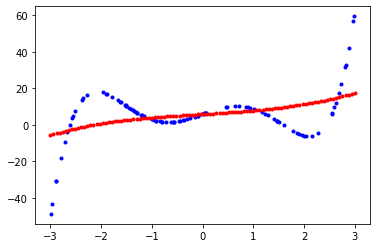

In [281]:
# using the data set that was given in th question one for the prediction plotting of the variables
plot_predictions(x, y, 2, 100)

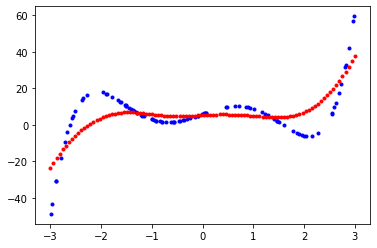

In [282]:
# using the data set that was given in th question one for the prediction plotting of the variables
plot_predictions(x, y, 0.7, 100)

The image here is extremely similar to the equation shown in the 3rd degree polynomial linear regression with Radial Basis Functions. I also tried changing the value for the tau which resulting in the overfitting of the model when the value given is smaller resulting in a smaller bias but larger variance for out of sample data and underfitting when the tau value is higher resulting in larger bias and oversimplification of the model.

3. 1. In the instance of the locally weighted approach, I did not need any basis functions to implement this model. The model itself selects the parameters to use based on the given weighted paramters and give the required inportance to which features should be employed in the model.
3. 2. The difference between the two implementations is that in the first one, we had to manually set the parameters or set a basis function for the model to be able to use that as a means of fitting the training data. In the locally weighted approach, no basis functions or feature selction was needed, the model itself did that selection. This is useful when the data that has been given are relatively small or if personall, the modeller would not want to go through selecting the parameters on his/her own which could sometimes introduce biases. As an example, I used 3rd degree and 5th degree basis functions for the first one. If there was an error, it would be added without properly being accounted for.